In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set the random seed to make the experiment reproducible 
random_seed = 1
np.random.seed(random_seed)

## BT5153 Assignemnt III

Working with Image Data: CNNs

In this homework, we will adopt the network structure that we learned, the convolutional network (CNN) for image data. It is  especially suited for feature extraction of image data. A CNN is a neural network typically composed of two components, one component for extracting useful features of the data, and another for performing a ML task (like classification based on the featurized data). We will also compare the performances and number of parameteres between Fully-Connected NNs and CNNs.

In [3]:
# image shape
image_shape = (64, 64)

# load faces data
faces_dataset = fetch_olivetti_faces(shuffle=True, random_state=random_seed)
faces = faces_dataset.data
n_samples, n_features = faces.shape

# function to visualize images
def plot_face(ax, img, image_shape):
    vmax = max(img.max(), -img.min())
    ax.imshow(img.reshape(image_shape), cmap=plt.cm.gray,
              interpolation='nearest',
              vmin=-vmax, vmax=vmax)
    return ax

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
labels = faces_dataset.target
# take images from only two individuals
X_flat = faces[(labels == 0) | (labels == 1)]
X = X_flat.reshape((20, 64, 64, 1))
Y = labels[(labels == 0) | (labels == 1)]

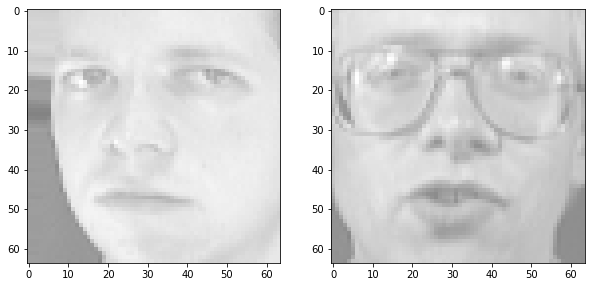

In [5]:
# we plot two sample images from the data set
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0] = plot_face(ax[0], X[Y == 0][0], image_shape)
ax[1] = plot_face(ax[1], X[Y == 1][0], image_shape)
plt.show()

## I. Classification with a FNN

**Task #1:** Build a shallow FNN to classify the face images. 
1. Only one hidden layer and its hidden layer size is 4
2. Activation function is set to be relu

In [6]:
# fix a width that is suited for image data (play with this)
input_dim = X_flat.shape[1]
H = input_dim
hidden_size = 4
# create sequential multi-layer perceptron
FCNN = Sequential()
#input layer
FCNN.add(Input(shape=(input_dim, )))
#hidden layer
#FCNN.add()
#binary classification, one output
#FCNN.add()
# configure the model
#FCNN.compile()

### What is the number of parameters in the above FCNN architecture?

hint: print a summary of the model 

In [7]:
## your answer

In [8]:
history = FCNN.fit(X_flat, Y, epochs=20, batch_size=5, verbose=0)

In [9]:
# evaluate the training and testing performance of your model 
score = FCNN.evaluate(X_flat, Y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.6931527853012085
Train accuracy: 0.5


## II. Classification with a CNN

**Task #2:** Build a CNN with one convolutional layer, one maxpooling layer and one dense layer to classify the face images. What are some theoretical strengths and drawbacks of using CNN versus MLP for handling image data? 

1. Kernel Size, Stride Size and number of filters for Conv2D layer is specified as below. The activation function is relu
2. The pooling size is 4 by 4 for maxpooling Layer

Other hyper-parameters in neural networks are set to be default.

In [10]:
# kernel size
kernel_size = (8, 8)
# stride size
stride_size = (1, 1)
# number of filters
filters = 4

cnn_model = Sequential()
cnn_model.add(Input(shape=(64, 64, 1)))
# feature extraction layer 0: convolution
# cnn_model.add()
# feature extraction layer 1: max pooling
# cnn_model.add()
# classification layer 2: flattening
# cnn_model.add()
# classification layer 3: dense non-linear transformation
# cnn_model.add()
# classification layer 4: output label probability
# cnn_model.add()
# configure the model
# cnn_model.compile()

### What is the number of parameters in the above CNN architecture. And compare the model size with the FCNN model size

In [ ]:
# your answer

In [12]:
# fit the model
history = cnn_model.fit(X, Y, epochs=20, batch_size=5, verbose=0)

In [13]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = cnn_model.evaluate(X, Y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.2929105758666992
Train accuracy: 1.0


You should find the CNN model size is smaller than the FCNN model size while FCNN's training accuracy is much lower than CNN's training accuracy. **Is it due to overfitting? If not, pls explain**

In [1]:
# your answer

## III What Exactly Does a CNN Learn?

We have learned that an MLP trained for classification learns a non-linear transformation of the data so that the classes are linearly separable. Here, we could try to get an intuitive understanding of what is the transformation learned from each hidden layer in a CNN.

hint: notebook in week6


**Task #3:** visualize the weights connected the input image to each node in the convolutional layer, these are called 'filters'. Explain how each filter is applied to the input image.

In [14]:
# visualize the four filters we learned


**Task #4:** visualize the output of the convolutional layer and the pooling layer separately. Describe how each layer has transformed the data.

In [ ]:
# visualize a training image after it passes through each filter
